# Thresholds for "random" in fingerprints the RDKit supports

This post has been updated multiple times. This version is from 16.03.2025. Older version of the notebook can be [found in github](https://github.com/greglandrum/rdkit_blog/blob/master/notebooks/Fingerprint%20Thresholds.ipynb).

> **Note** that older versions of this post had a mistake in the way the bit-based Morgan and FeatMorgan fingerprints were calculated: I was using the old fingerprint-generation functions and was generating folded count-based fingerprints instead of folded bit-based fingerprints. This led to similarity values and thresholds that were too high.

A frequent question that comes up when considering fingerprint similarity is: "What threshold should I use to determine what a neighbor is?" The answer is poorly defined. Of course it depends heavily on the details of the fingerprint, but there's also a very subjective component: you want to pick a low enough threshold that you're sure you won't miss anything, but you don't want to pick up too much noise.

The goal here is to systematically come up with some guidelines that can be used for fingerprints supported within the RDKit. We will do that by looking at similarities between random pairs of molecules picked from ChEMBL. The selection of the molecules used is [described in another post](https://greglandrum.github.io/rdkit-blog/posts/2025-03-16-building-a-similarity-comparison-set.html).

For the analysis, the 50K similarity values are sorted and the values at particular threshold are examined. 

There's a fair amount of code and results below, so here's the summary table. To help interpret this: 45000 of the 50000 pairs (90%) have a MACCS keys similarity value less than 0.549. 

<table>
<tr><th>Fingerprint</th><th>Metric</th><th>70% level</th><th>80% level</th><th>90% level</th><th>95% level</th><th>99% level</th></tr>
<tr><td>MACCS</td><td>Tanimoto</td>
  <td>0.457</td>
  <td>0.494</td>
  <td>0.549</td>
  <td>0.592</td>
  <td>0.667</td>
</tr><tr><td>Morgan0 (counts)</td><td>Tanimoto</td>
  <td>0.439</td>
  <td>0.477</td>
  <td>0.529</td>
  <td>0.575</td>
  <td>0.650</td>
</tr><tr><td>Morgan0 (bits)</td><td>Tanimoto</td>
  <td>0.500</td>
  <td>0.533</td>
  <td>0.600</td>
  <td>0.647</td>
  <td>0.750</td>
</tr><tr><td>Morgan1 (counts)</td><td>Tanimoto</td>
  <td>0.267</td>
  <td>0.294</td>
  <td>0.328</td>
  <td>0.360</td>
  <td>0.420</td>
</tr><tr><td>Morgan1 (bits)</td><td>Tanimoto</td>
  <td>0.213</td>
  <td>0.234</td>
  <td>0.267</td>
  <td>0.295</td>
  <td>0.356</td>
</tr><tr><td>Morgan2 (counts)</td><td>Tanimoto</td>
  <td>0.182</td>
  <td>0.200</td>
  <td>0.226</td>
  <td>0.248</td>
  <td>0.297</td>
</tr><tr><td>Morgan2 (bits)</td><td>Tanimoto</td>
  <td>0.133</td>
  <td>0.146</td>
  <td>0.167</td>
  <td>0.185</td>
  <td>0.226</td>
</tr><tr><td>Morgan3 (counts)</td><td>Tanimoto</td>
  <td>0.141</td>
  <td>0.154</td>
  <td>0.174</td>
  <td>0.192</td>
  <td>0.231</td>
</tr><tr><td>Morgan3 (bits)</td><td>Tanimoto</td>
  <td>0.102</td>
  <td>0.112</td>
  <td>0.127</td>
  <td>0.141</td>
  <td>0.173</td>
</tr><tr><td>FeatMorgan0 (counts)</td><td>Tanimoto</td>
  <td>0.500</td>
  <td>0.538</td>
  <td>0.591</td>
  <td>0.633</td>
  <td>0.710</td>
</tr><tr><td>FeatMorgan0 (bits)</td><td>Tanimoto</td>
  <td>0.583</td>
  <td>0.636</td>
  <td>0.700</td>
  <td>0.778</td>
  <td>0.889</td>
</tr><tr><td>FeatMorgan1 (counts)</td><td>Tanimoto</td>
  <td>0.300</td>
  <td>0.326</td>
  <td>0.364</td>
  <td>0.395</td>
  <td>0.455</td>
</tr><tr><td>FeatMorgan1 (bits)</td><td>Tanimoto</td>
  <td>0.245</td>
  <td>0.269</td>
  <td>0.302</td>
  <td>0.333</td>
  <td>0.395</td>
</tr><tr><td>FeatMorgan2 (counts)</td><td>Tanimoto</td>
  <td>0.203</td>
  <td>0.221</td>
  <td>0.247</td>
  <td>0.270</td>
  <td>0.319</td>
</tr><tr><td>FeatMorgan2 (bits)</td><td>Tanimoto</td>
  <td>0.146</td>
  <td>0.160</td>
  <td>0.181</td>
  <td>0.200</td>
  <td>0.241</td>
</tr><tr><td>FeatMorgan3 (counts)</td><td>Tanimoto</td>
  <td>0.156</td>
  <td>0.170</td>
  <td>0.190</td>
  <td>0.208</td>
  <td>0.248</td>
</tr><tr><td>FeatMorgan3 (bits)</td><td>Tanimoto</td>
  <td>0.110</td>
  <td>0.120</td>
  <td>0.135</td>
  <td>0.149</td>
  <td>0.181</td>
</tr><tr><td>RDKit 5 (counts)</td><td>Tanimoto</td>
  <td>0.152</td>
  <td>0.178</td>
  <td>0.216</td>
  <td>0.252</td>
  <td>0.333</td>
</tr><tr><td>RDKit 5 (bits)</td><td>Tanimoto</td>
  <td>0.204</td>
  <td>0.226</td>
  <td>0.262</td>
  <td>0.295</td>
  <td>0.371</td>
</tr><tr><td>RDKit 7 (counts)</td><td>Tanimoto</td>
  <td>0.065</td>
  <td>0.081</td>
  <td>0.107</td>
  <td>0.133</td>
  <td>0.201</td>
</tr><tr><td>RDKit 7 (bits)</td><td>Tanimoto</td>
  <td>0.327</td>
  <td>0.356</td>
  <td>0.398</td>
  <td>0.433</td>
  <td>0.510</td>
</tr><tr><td>linear RDKit 5 (counts)</td><td>Tanimoto</td>
  <td>0.198</td>
  <td>0.226</td>
  <td>0.267</td>
  <td>0.307</td>
  <td>0.388</td>
</tr><tr><td>linear RDKit 5 (bits)</td><td>Tanimoto</td>
  <td>0.206</td>
  <td>0.234</td>
  <td>0.276</td>
  <td>0.318</td>
  <td>0.405</td>
</tr><tr><td>linear RDKit 7 (counts)</td><td>Tanimoto</td>
  <td>0.123</td>
  <td>0.145</td>
  <td>0.179</td>
  <td>0.211</td>
  <td>0.287</td>
</tr><tr><td>linear RDKit 7 (bits)</td><td>Tanimoto</td>
  <td>0.189</td>
  <td>0.209</td>
  <td>0.240</td>
  <td>0.270</td>
  <td>0.338</td>
</tr><tr><td>Atom Pairs (counts)</td><td>Tanimoto</td>
  <td>0.183</td>
  <td>0.206</td>
  <td>0.238</td>
  <td>0.266</td>
  <td>0.320</td>
</tr><tr><td>Atom Pairs (bits)</td><td>Tanimoto</td>
  <td>0.285</td>
  <td>0.310</td>
  <td>0.344</td>
  <td>0.371</td>
  <td>0.419</td>
</tr><tr><td>Topological Torsions (counts)</td><td>Tanimoto</td>
  <td>0.103</td>
  <td>0.125</td>
  <td>0.158</td>
  <td>0.188</td>
  <td>0.256</td>
</tr><tr><td>Topological Torsions (bits)</td><td>Tanimoto</td>
  <td>0.131</td>
  <td>0.152</td>
  <td>0.185</td>
  <td>0.214</td>
  <td>0.279</td>
</tr><tr><td>Avalon (counts)</td><td>Tanimoto</td>
  <td>0.307</td>
  <td>0.339</td>
  <td>0.385</td>
  <td>0.424</td>
  <td>0.499</td>
</tr><tr><td>Avalon (bits)</td><td>Tanimoto</td>
  <td>0.388</td>
  <td>0.425</td>
  <td>0.475</td>
  <td>0.515</td>
  <td>0.589</td>
</tr><tr><td>Pattern</td><td>Tanimoto</td>
  <td>0.605</td>
  <td>0.633</td>
  <td>0.669</td>
  <td>0.698</td>
  <td>0.750</td>
</tr><tr><td>Gobbi2D</td><td>Tanimoto</td>
  <td>0.175</td>
  <td>0.205</td>
  <td>0.251</td>
  <td>0.292</td>
  <td>0.373</td>
</tr></table>


In [1]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import rdkit
from rdkit import DataStructs
from collections import defaultdict
import pickle,random,gzip
print(rdkit.__version__)
import time
print(time.asctime())

from matplotlib import pyplot as plt
plt.style.use('tableau-colorblind10')

%matplotlib inline

2024.09.6
Sun Mar 16 07:19:01 2025


# Read in the data

We're using the set of 50K reference pairs generated in this post: [https://greglandrum.github.io/rdkit-blog/posts/2025-03-16-building-a-similarity-comparison-set.html](https://greglandrum.github.io/rdkit-blog/posts/2025-03-16-building-a-similarity-comparison-set.html).

As a quick reminder: these are pairs of molecules taken from ChEMBL with a single fragment, less than 50 heavy atoms, and a count-based MFP0 similarity of at least 0.65 to each other.

In [2]:
ind = [x.split(b'\t') for x in gzip.open('../data/chembl35_50K.mfp0.pairs.txt.gz')]
ms1 = []
ms2 = []
for i,row in enumerate(ind):
    m1 = Chem.MolFromSmiles(row[1])
    ms1.append((row[0],m1))
    m2 = Chem.MolFromSmiles(row[3])
    ms2.append((row[2],m2))
    


Those pairs are related to each other, but we want random pairs, so shuffle the second list:

In [3]:
random.seed(23)
random.shuffle(ms2)

In [4]:
try:
    import ipyparallel as ipp
    rc = ipp.Client()
    dview = rc[:]
    dview.execute('from rdkit import Chem')
    dview.execute('from rdkit import Descriptors')
    dview.execute('from rdkit.Chem import rdFingerprintGenerator')
    dview.execute('from rdkit.Chem import rdMolDescriptors')
    dview.execute('from rdkit import DataStructs')
    dview.execute('from rdkit.Avalon import pyAvalonTools')
    dview.execute('from rdkit.Chem.Pharm2D import Gobbi_Pharm2D,Generate')
except:
    print("could not use ipyparallel")
    dview = None

results_accum = dict()
def accumResults(fps,fp2s,fpName):
    sims = [DataStructs.TanimotoSimilarity(x,y) for x,y in zip(fps,fp2s)]
    sl = sorted(sims)
    np = len(sl)
    with open('fp_results.txt','a+') as outf:
        outf.write(f'<tr><td>{fpName}</td><td>Tanimoto</td>\n')
        accum = {}
        for bin in (.7,.8,.9,.95,.99):
            simv = sl[int(bin*np)]
            print( bin,simv)
            outf.write(f'  <td>{simv:.3f}</td>\n')
            accum[bin] = simv
        outf.write('</tr>')
        results_accum[fpName] = accum
    plt.figure(figsize=(5,3))
    plt.hist(sims,bins=20)
    plt.xlabel(fpName)
    
def compareFPs(ms1,ms2,fpfn,fpName):
    if dview is not None:
        fps = dview.map_sync(lambda x:fpfn(x[1]),ms1)
        fp2s = dview.map_sync(lambda x:fpfn(x[1]),ms2)
    else:
        fps = [fpfn(x[1]) for x in ms1]
        fp2s = [fpfn(x[1]) for x in ms2]
    accumResults(fps,fp2s,fpName)

# MACCS

0.7 0.45714285714285713
0.8 0.4936708860759494
0.9 0.5487804878048781
0.95 0.5921052631578947
0.99 0.6666666666666666


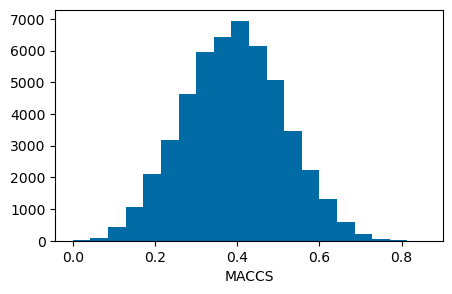

In [5]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetMACCSKeysFingerprint(x),"MACCS")

# Morgan FPs

## count based

0.7 0.43902439024390244
0.8 0.4772727272727273
0.9 0.5294117647058824
0.95 0.575
0.99 0.65
0.7 0.5
0.8 0.5333333333333333
0.9 0.6
0.95 0.6470588235294118
0.99 0.75


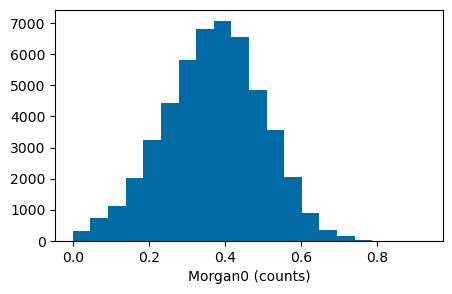

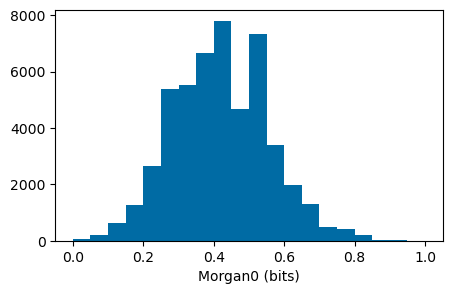

In [6]:
fpg = rdFingerprintGenerator.GetMorganGenerator(radius=0)
fps = fpg.GetSparseCountFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetSparseCountFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"Morgan0 (counts)")

fps = fpg.GetFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"Morgan0 (bits)")


0.7 0.26732673267326734
0.8 0.29411764705882354
0.9 0.328
0.95 0.36
0.99 0.42028985507246375
0.7 0.2127659574468085
0.8 0.23404255319148937
0.9 0.26666666666666666
0.95 0.29545454545454547
0.99 0.35555555555555557


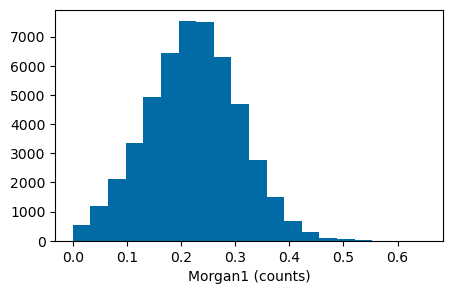

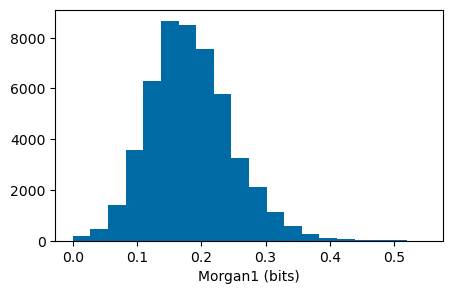

In [7]:
fpg = rdFingerprintGenerator.GetMorganGenerator(radius=1)
fps = fpg.GetSparseCountFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetSparseCountFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"Morgan1 (counts)")

fps = fpg.GetFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"Morgan1 (bits)")

0.7 0.18181818181818182
0.8 0.2
0.9 0.22560975609756098
0.95 0.24786324786324787
0.99 0.2967032967032967
0.7 0.1326530612244898
0.8 0.14606741573033707
0.9 0.16666666666666666
0.95 0.18518518518518517
0.99 0.2261904761904762


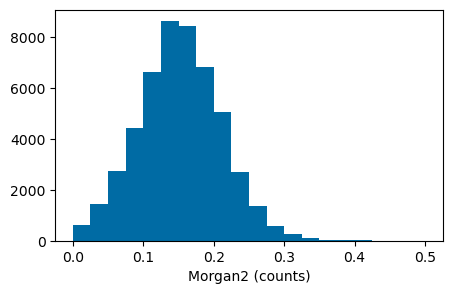

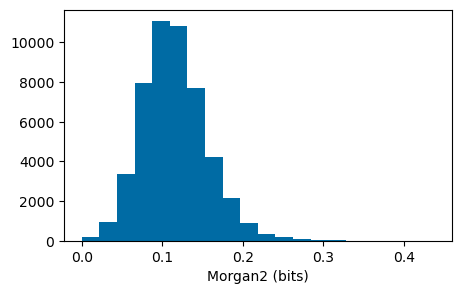

In [8]:
fpg = rdFingerprintGenerator.GetMorganGenerator(radius=2)
fps = fpg.GetSparseCountFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetSparseCountFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"Morgan2 (counts)")

fps = fpg.GetFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"Morgan2 (bits)")

0.7 0.14054054054054055
0.8 0.15441176470588236
0.9 0.1743119266055046
0.95 0.19186046511627908
0.99 0.23076923076923078
0.7 0.10240963855421686
0.8 0.11214953271028037
0.9 0.12727272727272726
0.95 0.14084507042253522
0.99 0.17293233082706766


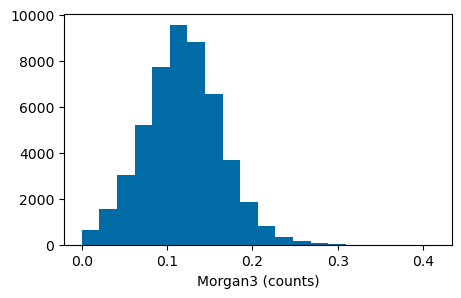

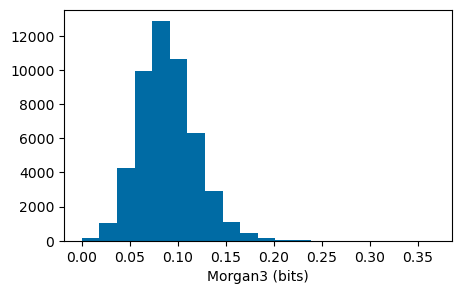

In [9]:
fpg = rdFingerprintGenerator.GetMorganGenerator(radius=3)
fps = fpg.GetSparseCountFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetSparseCountFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"Morgan3 (counts)")

fps = fpg.GetFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"Morgan3 (bits)")

# FeatMorgan

## count based

0.7 0.5
0.8 0.5384615384615384
0.9 0.5909090909090909
0.95 0.6333333333333333
0.99 0.7096774193548387
0.7 0.5833333333333334
0.8 0.6363636363636364
0.9 0.7
0.95 0.7777777777777778
0.99 0.8888888888888888


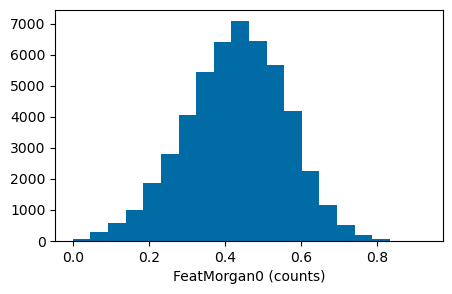

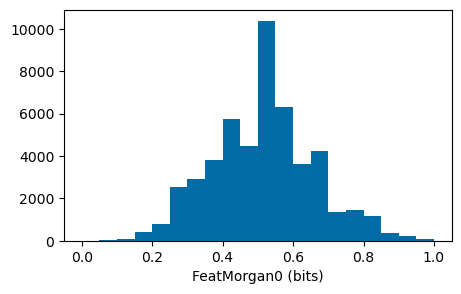

In [10]:
fpg = rdFingerprintGenerator.GetMorganGenerator(radius=0,
                                                atomInvariantsGenerator=rdFingerprintGenerator.GetMorganAtomInvGen())

fps = fpg.GetSparseCountFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetSparseCountFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"FeatMorgan0 (counts)")

fps = fpg.GetFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"FeatMorgan0 (bits)")


0.7 0.3
0.8 0.3263157894736842
0.9 0.36363636363636365
0.95 0.39473684210526316
0.99 0.45454545454545453
0.7 0.24489795918367346
0.8 0.2692307692307692
0.9 0.3023255813953488
0.95 0.3333333333333333
0.99 0.39473684210526316


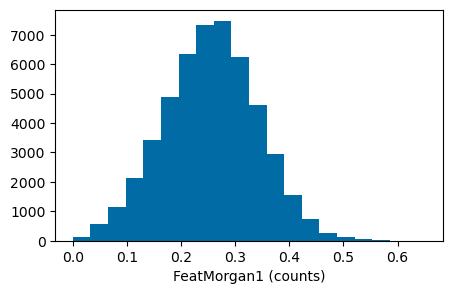

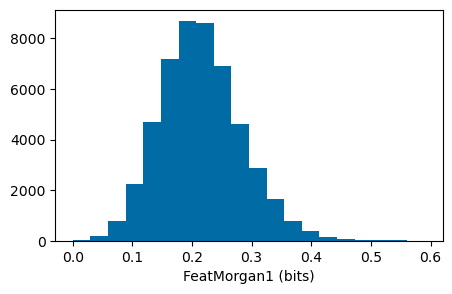

In [11]:
fpg = rdFingerprintGenerator.GetMorganGenerator(radius=1,
                                                atomInvariantsGenerator=rdFingerprintGenerator.GetMorganAtomInvGen())

fps = fpg.GetSparseCountFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetSparseCountFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"FeatMorgan1 (counts)")

fps = fpg.GetFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"FeatMorgan1 (bits)")


0.7 0.20261437908496732
0.8 0.22115384615384615
0.9 0.2471264367816092
0.95 0.26993865030674846
0.99 0.3191489361702128
0.7 0.14583333333333334
0.8 0.1595744680851064
0.9 0.18055555555555555
0.95 0.2
0.99 0.2413793103448276


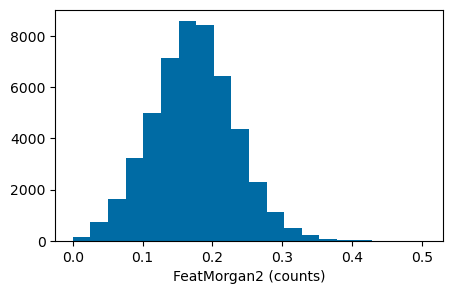

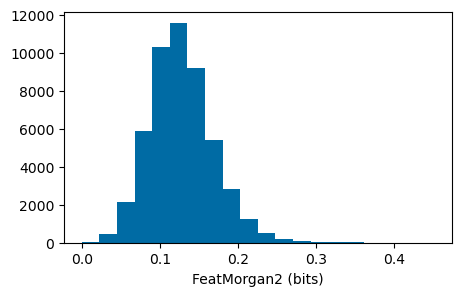

In [12]:
fpg = rdFingerprintGenerator.GetMorganGenerator(radius=2,
                                                atomInvariantsGenerator=rdFingerprintGenerator.GetMorganAtomInvGen())

fps = fpg.GetSparseCountFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetSparseCountFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"FeatMorgan2 (counts)")

fps = fpg.GetFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"FeatMorgan2 (bits)")


0.7 0.1564245810055866
0.8 0.1702127659574468
0.9 0.1901840490797546
0.95 0.20833333333333334
0.99 0.2484472049689441
0.7 0.11016949152542373
0.8 0.12
0.9 0.1348314606741573
0.95 0.14925373134328357
0.99 0.18095238095238095


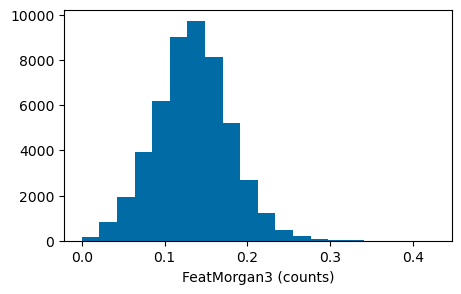

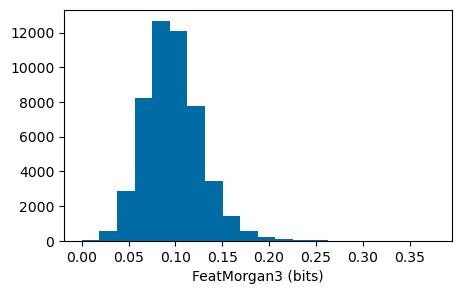

In [13]:
fpg = rdFingerprintGenerator.GetMorganGenerator(radius=3,
                                                atomInvariantsGenerator=rdFingerprintGenerator.GetMorganAtomInvGen())

fps = fpg.GetSparseCountFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetSparseCountFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"FeatMorgan3 (counts)")

fps = fpg.GetFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"FeatMorgan3 (bits)")


# RDKit

## Branched (default)

0.7 0.15225563909774437
0.8 0.17751479289940827
0.9 0.21566401816118047
0.95 0.25167336010709507
0.99 0.33264033264033266
0.7 0.2035225048923679
0.8 0.22637106184364061
0.9 0.2615803814713896
0.95 0.29458917835671344
0.99 0.37115839243498816


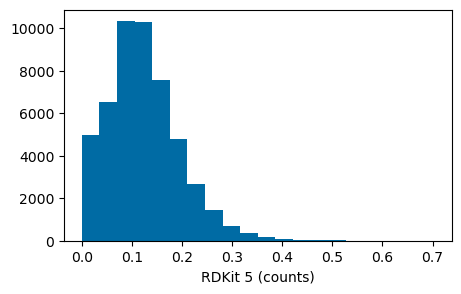

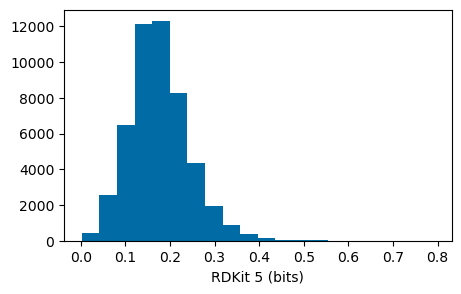

In [14]:
fpg = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)

fps = fpg.GetSparseCountFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetSparseCountFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"RDKit 5 (counts)")

fps = fpg.GetFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"RDKit 5 (bits)")


0.7 0.06525573192239859
0.8 0.08085106382978724
0.9 0.10695825049701789
0.95 0.13349296617779108
0.99 0.2012158054711246
0.7 0.32704918032786884
0.8 0.3560295324036095
0.9 0.39775413711583923
0.95 0.4330800701344243
0.99 0.5104972375690607


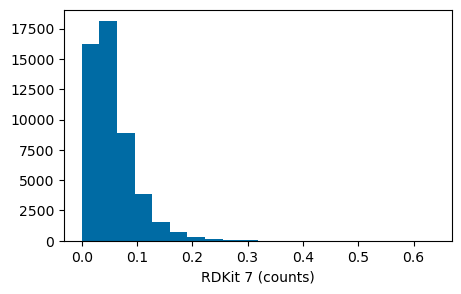

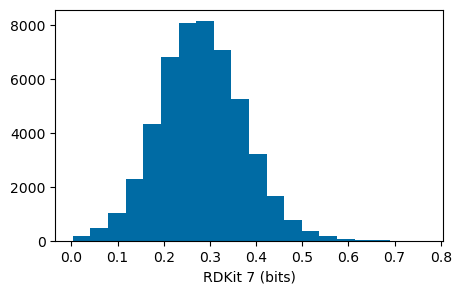

In [15]:
fpg = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=7)

fps = fpg.GetSparseCountFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetSparseCountFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"RDKit 7 (counts)")

fps = fpg.GetFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"RDKit 7 (bits)")


## linear

0.7 0.19827586206896552
0.8 0.22613065326633167
0.9 0.2673913043478261
0.95 0.3072100313479624
0.99 0.3875739644970414
0.7 0.20640569395017794
0.8 0.23367697594501718
0.9 0.27647058823529413
0.95 0.3177257525083612
0.99 0.40512820512820513


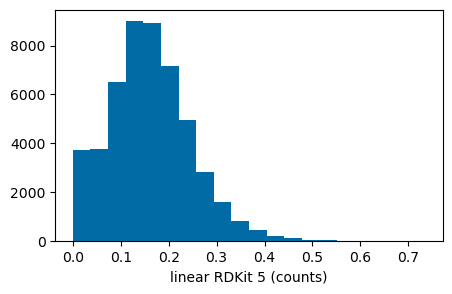

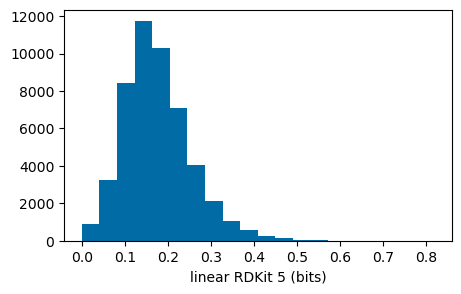

In [16]:
fpg = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5,branchedPaths=False)

fps = fpg.GetSparseCountFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetSparseCountFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"linear RDKit 5 (counts)")

fps = fpg.GetFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"linear RDKit 5 (bits)")


0.7 0.12305516265912306
0.8 0.14457831325301204
0.9 0.17861975642760486
0.95 0.21080368906455862
0.99 0.28660826032540676
0.7 0.18908629441624367
0.8 0.20855614973262032
0.9 0.24014778325123154
0.95 0.26991150442477874
0.99 0.3379174852652259


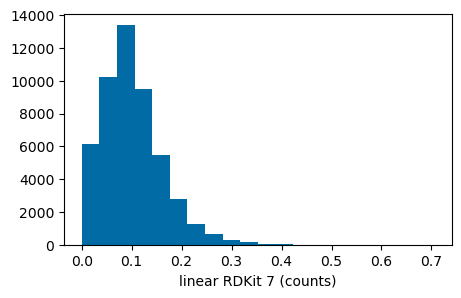

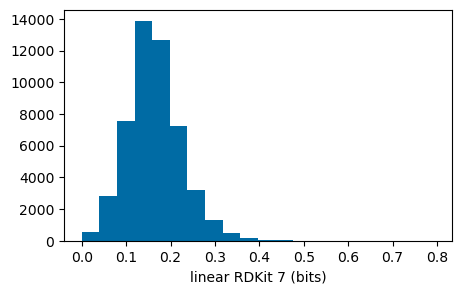

In [17]:
fpg = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=7,branchedPaths=False)

fps = fpg.GetSparseCountFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetSparseCountFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"linear RDKit 7 (counts)")

fps = fpg.GetFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"linear RDKit 7 (bits)")


# Atom pairs and torsions

0.7 0.1825242718446602
0.8 0.20576923076923076
0.9 0.23832923832923833
0.95 0.2661290322580645
0.99 0.3203252032520325
0.7 0.2848101265822785
0.8 0.3097713097713098
0.9 0.3438077634011091
0.95 0.37092731829573933
0.99 0.41869158878504675


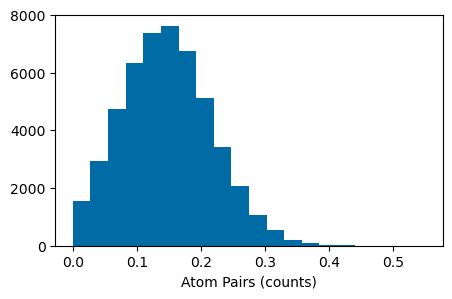

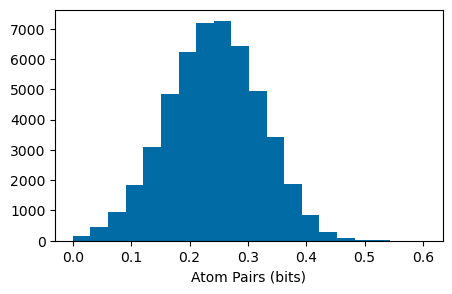

In [18]:
fpg = rdFingerprintGenerator.GetAtomPairGenerator()

fps = fpg.GetSparseCountFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetSparseCountFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"Atom Pairs (counts)")

fps = fpg.GetFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"Atom Pairs (bits)")


0.7 0.10344827586206896
0.8 0.125
0.9 0.15789473684210525
0.95 0.18811881188118812
0.99 0.2564102564102564
0.7 0.13114754098360656
0.8 0.15217391304347827
0.9 0.18478260869565216
0.95 0.21428571428571427
0.99 0.27941176470588236


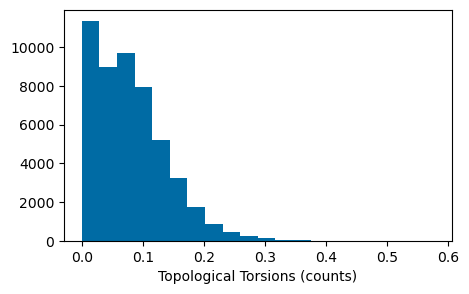

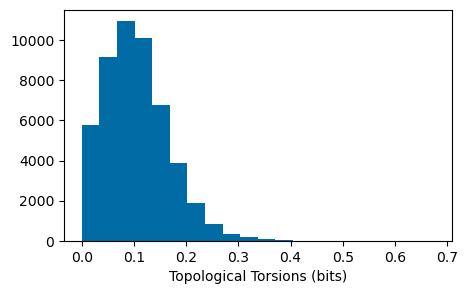

In [19]:
fpg = rdFingerprintGenerator.GetTopologicalTorsionGenerator()

fps = fpg.GetSparseCountFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetSparseCountFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"Topological Torsions (counts)")

fps = fpg.GetFingerprints([x[1] for x in ms1],numThreads=8)
fp2s = fpg.GetFingerprints([x[1] for x in ms2],numThreads=8)
accumResults(fps,fp2s,"Topological Torsions (bits)")


# Avalon

0.7 0.3074761101742552
0.8 0.3394988066825776
0.9 0.38517796196977083
0.95 0.4236111111111111
0.99 0.4988066825775656


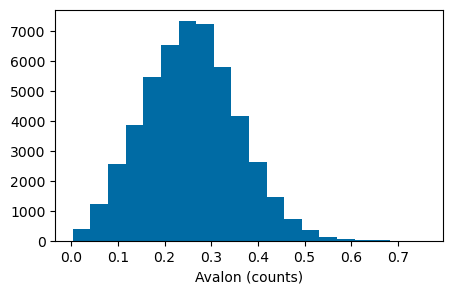

In [20]:
compareFPs(ms1,ms2,lambda x:pyAvalonTools.GetAvalonCountFP(x),"Avalon (counts)")


0.7 0.38765432098765434
0.8 0.4245614035087719
0.9 0.4748201438848921
0.95 0.5148148148148148
0.99 0.5888077858880778


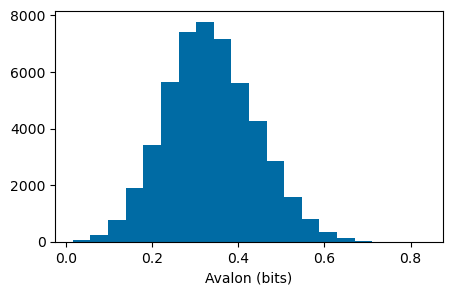

In [21]:
compareFPs(ms1,ms2,lambda x:pyAvalonTools.GetAvalonFP(x),"Avalon (bits)")


# Pattern

0.7 0.6049382716049383
0.8 0.6327212020033389
0.9 0.6694677871148459
0.95 0.6984126984126984
0.99 0.7504


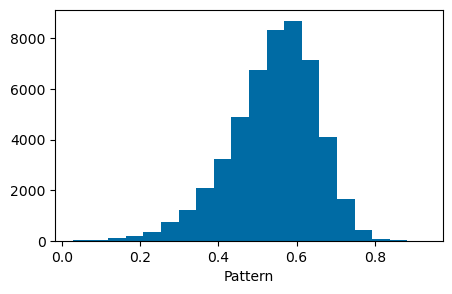

In [22]:
compareFPs(ms1,ms2,lambda x:Chem.PatternFingerprint(x),"Pattern")


# Gobbi2D pharmacophore fingerprints

In [23]:
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D,Generate
def Gobbi2D_bits(mol,fpLen=2048):
    res = DataStructs.ExplicitBitVect(fpLen)
    for bit in Generate.Gen2DFingerprint(mol,Gobbi_Pharm2D.factory).GetOnBits():
        # the bits are not hashed, so we need to do so before we fold them:
        res.SetBit(hash((bit,))%fpLen)
    return res

0.7 0.17470881863560733
0.8 0.20520231213872833
0.9 0.25068493150684934
0.95 0.29214402618657936
0.99 0.3725124378109453


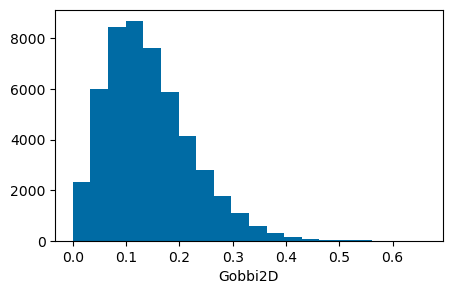

In [24]:
compareFPs(ms1,ms2,Gobbi2D_bits,"Gobbi2D")


In [25]:
pickle.dump(results_accum,open('./results/fp_thresholds_random_accum.pkl','wb+'))